# Data Preprocessing

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/syedayazsa/data/master/food_items.csv')

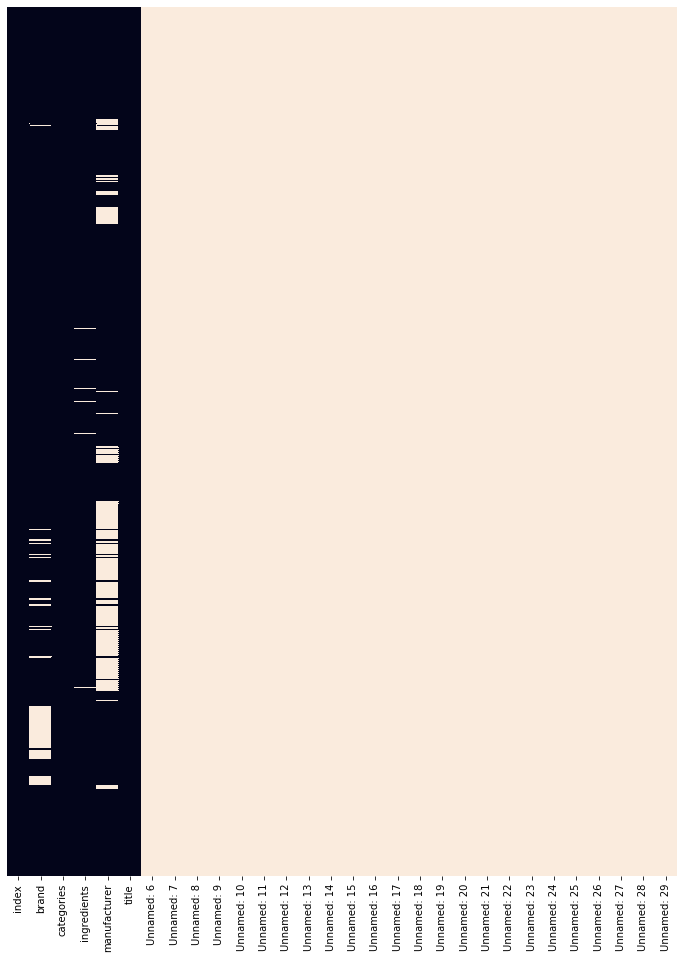

In [132]:
plt.figure(figsize=(12, 16))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [133]:
df = df[['index', 'brand', 'categories', 'ingredients', 'manufacturer', 'title']]               

Dropping other columns because they have more than 90% NaN values

In [134]:
df

,index,brand,categories,ingredients,manufacturer,title
0,0,Simon Fischer,"Grocery & Gourmet Food,Food,Grocery","Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",Sokol And Company,Simon Fischer Fruit Bttr Prune Lekvar
1,1,McCormick,"Grocery & Gourmet Food,Food,Grocery","Salt,Sugar,Molasses (Refinery Syrup, Molasses,...","McCormick & Co, Inc",McCORMICK GRILL MATES MOLASSES BACON SEASONING...
2,2,Jolly Time,"Grocery & Gourmet Food,Grocery","Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",Reese's,Jolly Time Popcorn
3,3,Ziyad,"Grocery & Gourmet Food,grocery",Mechanically hulled seasame seeds.Allergy Info...,Ziyad,Ziyad Tahini Sesame Sauce
4,4,Fla-Vor-Ice,"Grocery & Gourmet Food,grocery",FALSE,Fla-Vor-Ice,Fla-Vor-Ice Plus Giant Pops
...,...,...,...,...,...,...
9995,9995,Wright's,"Barbecue,Grocery & Gourmet Food,Sauces, Gravie...","water,natural hickory smoke flavor.",Wright's,Wright's Liquid Smoke - 3.5 Oz
9996,9996,Eden Foods,"Food,Snacks, Cookies & Chips,Nuts & Trail Mixe...","Organic Dry Roasted Almonds,Organic Tamari Soy...",Eden Foods,Eden Foods Organic Pocket Snacks - Tamari Almo...
9997,9997,Happy Belly,"Cashews,Grocery & Gourmet Food,Cooking & Bakin...","Cashews, Vegetable Oil (May Contain One Or Mor...",AFS Brands LLC,"Happy Belly Fancy Whole Cashews, 44 Ounce"
9998,9998,Quaker,"Food,Snacks, Cookies & Chips,Rice Cakes,Chips,...","Whole Grain Brown Rice Flour,Degerminated Mill...",Quaker Oats,QuakerÂ® PoppedÂ® Cheddar Cheese Rice Crisps 6...


In [135]:
df.drop(['index'], axis=1, inplace=True)                                            #Dropping redundant column

In [136]:
features = df.columns

In [137]:
for feature in features:
    df[feature]=df[feature].fillna("")

In [138]:
df

,brand,categories,ingredients,manufacturer,title
0,Simon Fischer,"Grocery & Gourmet Food,Food,Grocery","Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",Sokol And Company,Simon Fischer Fruit Bttr Prune Lekvar
1,McCormick,"Grocery & Gourmet Food,Food,Grocery","Salt,Sugar,Molasses (Refinery Syrup, Molasses,...","McCormick & Co, Inc",McCORMICK GRILL MATES MOLASSES BACON SEASONING...
2,Jolly Time,"Grocery & Gourmet Food,Grocery","Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",Reese's,Jolly Time Popcorn
3,Ziyad,"Grocery & Gourmet Food,grocery",Mechanically hulled seasame seeds.Allergy Info...,Ziyad,Ziyad Tahini Sesame Sauce
4,Fla-Vor-Ice,"Grocery & Gourmet Food,grocery",FALSE,Fla-Vor-Ice,Fla-Vor-Ice Plus Giant Pops
...,...,...,...,...,...
9995,Wright's,"Barbecue,Grocery & Gourmet Food,Sauces, Gravie...","water,natural hickory smoke flavor.",Wright's,Wright's Liquid Smoke - 3.5 Oz
9996,Eden Foods,"Food,Snacks, Cookies & Chips,Nuts & Trail Mixe...","Organic Dry Roasted Almonds,Organic Tamari Soy...",Eden Foods,Eden Foods Organic Pocket Snacks - Tamari Almo...
9997,Happy Belly,"Cashews,Grocery & Gourmet Food,Cooking & Bakin...","Cashews, Vegetable Oil (May Contain One Or Mor...",AFS Brands LLC,"Happy Belly Fancy Whole Cashews, 44 Ounce"
9998,Quaker,"Food,Snacks, Cookies & Chips,Rice Cakes,Chips,...","Whole Grain Brown Rice Flour,Degerminated Mill...",Quaker Oats,QuakerÂ® PoppedÂ® Cheddar Cheese Rice Crisps 6...


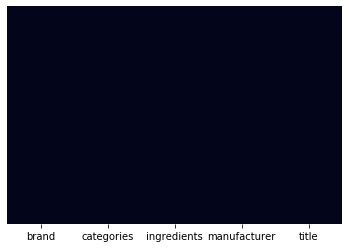

In [139]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

# Training

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [141]:
cv = CountVectorizer()

In [142]:
count_matrix = cv.fit_transform(df['ingredients'])
sim_scores = cosine_similarity(count_matrix)

In [143]:
sim_scores

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.03798686,
        0.07049074],
       [0.18898224, 1.        , 0.20833333, ..., 0.20412415, 0.17588162,
        0.09325048],
       [0.        , 0.20833333, 1.        , ..., 0.13608276, 0.26801008,
        0.03108349],
       ...,
       [0.        , 0.20412415, 0.13608276, ..., 1.        , 0.14360674,
        0.13324272],
       [0.03798686, 0.17588162, 0.26801008, ..., 0.14360674, 1.        ,
        0.17806849],
       [0.07049074, 0.09325048, 0.03108349, ..., 0.13324272, 0.17806849,
        1.        ]])

# Testing


In [144]:
sample=df.sample(n=1)


In [145]:
sample.index[0]

9611

In [146]:
sample_scores = sim_scores[sample.index[0]]

In [147]:
top50 = np.sort(sample_scores)[::-1][:50]

In [148]:
top_index = []

In [149]:
for i in top50:
    top_index.append(np.where(sample_scores == i))

In [150]:
indices=[]
for i in range(50):
    indices.append(top_index[i][0][0]) 

In [151]:
indices                                                     #Indices of top 50 items similar in ingredients with sample

[9611,
 6669,
 9589,
 9568,
 6846,
 4429,
 5228,
 5131,
 6468,
 3816,
 3042,
 7344,
 5098,
 7538,
 6167,
 6848,
 5377,
 3023,
 9500,
 4092,
 6481,
 7563,
 4291,
 4346,
 7672,
 7677,
 3390,
 6193,
 7247,
 4581,
 2246,
 7699,
 2264,
 2264,
 1225,
 8035,
 6959,
 7258,
 2096,
 3658,
 6814,
 6864,
 4402,
 5662,
 1933,
 1933,
 1933,
 2576,
 8991,
 6116]

In [152]:
df.iloc[indices]

,brand,categories,ingredients,manufacturer,title
9611,Manitoba Harvest,"Grocery & Gourmet Food,Cooking & Baking,Nuts &...","Total Fat 13 g 21%,Saturated Fat 1.5 g 7%,Tran...",Lundberg,Manitoba Harvest Natural Hemp Hearts
6669,Rice Krispies,"Household and Grocery,Food and Snacks,Bars",Per Bar (22 g) Calories 90 (Calories From Fat ...,,Kelloggs Rice Krispies Treats Bars
9589,Tasty Bite,"Grocery & Gourmet Food,Packaged Meals & Side D...","Calories (150), Calories From Fat (50), Total ...",Proudfoot Pr,Tasty Bite Indian EntrÃ©e
9568,Kirkland Signature,"Applesauce,Grocery & Gourmet Food,Snack Foods,...",Nutrition Facts Serving Size 1 pouch (90g) Ser...,Costco,Kirkland Signature Organic Applesaucec 24 Coun...
6846,Simply Organic,"Grocery & Gourmet Food,Herbs, Spices & Seasonings","Total Fat 0 g 0%,Sat. Fat 0 g 0%,Trans Fat 0 g...",,Simply Organic Grilling Seasons Chicken
4429,Inka Crops,"Food,Snacks,Bean & Veggie Snacks,Grocery & Gou...","Plantains,palm oil and sea salt,Calories (140 ...",Inka Crops,Plantain Chips
5228,Edward Sons,"Grocery & Gourmet Food,Snack Foods,Crackers,Gr...","Calories (60),Calories From Fat (5),Total Fat,...",,Brown Rice Snaps
5131,Love Grown,"Grocery & Gourmet Food,Breakfast Foods,Cereals...","Calories (230), Calories From Fat (30), Total ...",,Love Grown Hot Oats
6468,Werthers,"Household and Grocery,Food and Snacks,Candy",Per 3 Pieces (15 g) Calories 60 (Calories From...,,Werthers Original Hard Candies
3816,KIND,"Grocery & Gourmet Food,Snack Foods,Snacks",Serving Size 1 Bar Servings Per Container 1 Am...,Kind Healthy Snacks,KIND Fruit & Nut
